In [73]:
import os
os.environ['USE_PYGEOS'] = '0'
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
from shapely import Point
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
path_ResOps = Path('Z:/nahaUsers/casadje/datasets/reservoirs/ResOpsUS')

path_attrs = path_ResOps / 'attributes'

### Reservoirs

In [48]:
# load reservoir attributes
attributes = pd.read_csv(path_ResOps / 'attributes' / 'reservoir_attributes.csv', index_col='DAM_ID')

# load time series recorded for each reservoir
inventory = pd.read_csv(path_ResOps / 'attributes' / 'time_series_inventory.csv', index_col='DAM_ID')

# merge attributes and inventory and convert into geopandas
reservoirs = pd.merge(attributes, inventory, left_index=True, right_index=True)
reservoirs = gpd.GeoDataFrame(reservoirs,
                              geometry=[Point(xy) for xy in zip(reservoirs.LONG, reservoirs.LAT)])
reservoirs.crs = 'EPSG:4326'

print('ResOpsUS contains {0} reservoirs.'.format(reservoirs.shape[0]))
print('{0} of those have storage time series.'.format((reservoirs.STORAGE == 1).sum()))

ResOpsUS contains 678 reservoirs.
653 of those have storage time series.


In [49]:
# simplify column names
reservoirs.rename(columns={'AGENCY_CODE': 'AGENCY_COD',
         'TIME_SERIES_START': 'TS_START',
         'TIME_SERIES_END': 'TS_END',
         'INCONSISTENCIES_NOTED': 'NOTES',
         'STORAGE_START': 'STO_START',
         'STORAGE_END': 'STO_END',
         'DATA_SOURCE': 'STO_SOURCE',
         'INFLOW_START': 'IN_START',
         'INFLOW_END': 'IN_END',
         'DATA_SOURCE.1': 'IN_SOURCE',
         'OUTFLOW_START': 'OUT_START',
         'OUTFLOW_END': 'OUT_END',
         'DATA_SOURCE.2': 'OUT_SOURCE', 
         'ELEVATION_START': 'ELE_START', 
         'ELEVATION_END': 'ELE_END',
         'DATA_SOURCE.3': 'ELE_SOURCE',
         'EVAPORATION': 'EVAPORA',
         'EVAPORATION_START': 'EVA_START', 
         'EVAPORATION_END': 'EVA_END',
         'DATA_SOURCE.4': 'EVA_SOURCE'},
                 inplace=True)

In [50]:
# export as shapefile
path_GIS = path_ResOps / 'GIS'
if path_GIS.exists() is False:
    path_GIS.mkdir()
reservoirs.to_file(path_GIS / 'reservoirs.shp')

In [47]:
ID = 41

series = pd.read_csv(path_ResOps / 'time_series_all' / f'ResOpsUS_{ID}.csv', parse_dates=True, index_col='date')

series.head()

,storage,inflow,outflow,elevation,evaporation
date,,,,,
1970-10-01,1149.749,29.733,NaN,485.269,NaN
1970-10-02,1146.835,26.901,NaN,485.205,NaN
1970-10-03,1148.499,20.530,NaN,485.242,NaN
1970-10-04,1150.026,26.193,NaN,485.275,NaN
1970-10-05,1145.588,37.520,NaN,485.178,NaN


In [80]:
from matplotlib import gridspec

'41 - Ross'

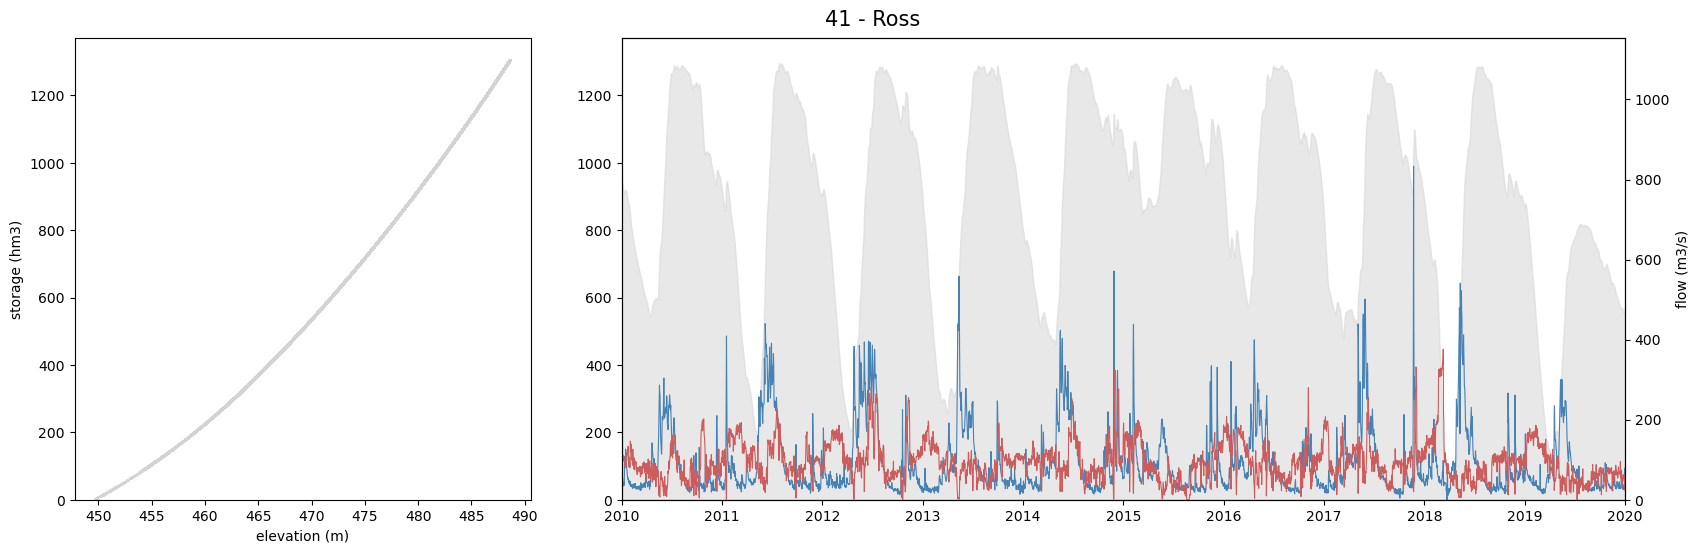

In [107]:
# Create the figure and define the grid specification
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(1, 3)

# Create the first graph in the left-most third
ax1 = plt.subplot(gs[0])
ax1.scatter(series.elevation, series.storage, s=1, c='lightgray');
ax1.set(xlabel='elevation (m)',
        ylim=(0, None),
        ylabel='storage (hm3)')

# Create the second graph in the remaining area
ax2 = plt.subplot(gs[1:], sharey=ax1)
ax2.fill_between(series.index, series.storage, color='lightgray', alpha=.5)
ax2.set(xlim=(datetime(2010, 1, 1), datetime(2020, 1, 1)), #(series.index[0], series.index[-1])
        );

ax2_ = ax2.twinx()
ax2_.plot(series.inflow, lw='.8', c='steelblue')
ax2_.plot(series.outflow, lw='.8', c='indianred')
ax2_.set(ylim=(0, None),
        ylabel='flow (m3/s)');

fig.text(.5, .9, '{0} - {1}'.format(ID, reservoirs.loc[ID, 'DAM_NAME']), fontsize=15);